In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 2:
1. Using different data for training and test data.
2. Exclude named entity. Replace NE into O

In [3]:
train_data_ = read_tsv('../dataset/train-data-140422.tsv')
test_data_ = read_tsv('../dataset/test-data-140422.tsv')


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.86      0.97      0.91     11139
          JV       0.90      0.81      0.85      4906
          EN       0.84      0.83      0.84      1746
           O       0.97      0.89      0.93      5476
   MIX-ID-EN       0.83      0.60      0.70       578
   MIX-ID-JV       0.96      0.38      0.54       204
   MIX-JV-EN       0.98      0.36      0.53       258

    accuracy                           0.89     24307
   macro avg       0.91      0.69      0.76     24307
weighted avg       0.89      0.89      0.88     24307



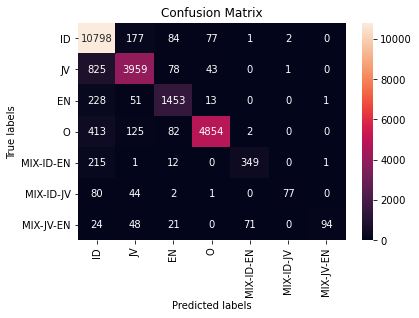


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.97      0.99      0.98     56598
          JV       0.93      0.92      0.92      9702
          EN       0.98      0.96      0.97     14323
           O       0.99      0.97      0.98     25223
   MIX-ID-EN       0.99      0.96      0.98      2394
   MIX-ID-JV       1.00      0.93      0.96       712
   MIX-JV-EN       0.97      0.93      0.95       530

    accuracy                           0.97    109482
   macro avg       0.98      0.95      0.96    109482
weighted avg       0.97      0.97      0.97    109482



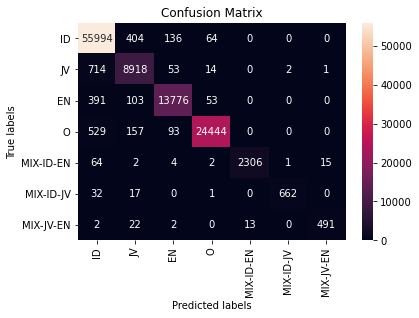


Top likely transitions:
O          -> O          3.68107
EN         -> O          2.75769
ID         -> O          2.74364
JV         -> O          2.32196
MIX-ID-EN  -> O          2.25144
MIX-ID-JV  -> O          1.66390
MIX-JV-EN  -> O          1.58842
EN         -> EN         1.44797
JV         -> JV         1.00987
O          -> ID         0.56117
ID         -> ID         0.52545
O          -> EN         0.48949
O          -> JV         0.33218
MIX-ID-JV  -> JV         0.26037
JV         -> MIX-JV-EN  0.25650
MIX-JV-EN  -> JV         0.14656
JV         -> MIX-ID-JV  -0.15050
MIX-ID-EN  -> ID         -0.19367
ID         -> EN         -0.21885
ID         -> MIX-ID-EN  -0.23447

Top unlikely transitions:
MIX-ID-EN  -> EN         -0.81634
ID         -> MIX-ID-JV  -0.84276
MIX-JV-EN  -> MIX-JV-EN  -0.99345
JV         -> EN         -0.99695
EN         -> JV         -1.08078
ID         -> JV         -1.33687
MIX-ID-JV  -> EN         -1.37268
MIX-JV-EN  -> MIX-ID-JV  -1.38345
JV         -

In [4]:
langid.train_test_result_(train_data=train_data_, test_data=test_data_, n_label=7, model_name='mod_080422_no_ne.pkl')

In [5]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)